In [19]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [21]:
train_dl = DataLoader(
    datasets.ImageFolder('data/Training', tf),
    batch_size=32,
    shuffle=True,   
    num_workers=4,
    pin_memory=True
)

In [22]:
test_dl = DataLoader(
    datasets.ImageFolder('data/Testing', tf),
    batch_size=32,
    shuffle=False,   
    num_workers=4,
    pin_memory=True
)

In [23]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 4) # Assuming 4 classes for classification
).to(device)

In [24]:
opt = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [25]:
model.train()

for epoch in range(30):  # Example: 10 epochs
    running_loss = 0.0
    for x, y in train_dl:
        opt.zero_grad()
        loss = criterion(model(x.to(device)), y.to(device))
        loss.backward()
        running_loss += loss
        opt.step()
        
        
        
    print(f"Epoch [{epoch+1}/30], Loss: {running_loss:.4f}")

c:\Users\Hakeem\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [1/30], Loss: 151.8783
Epoch [2/30], Loss: 102.0626
Epoch [3/30], Loss: 85.7589
Epoch [4/30], Loss: 74.0691
Epoch [5/30], Loss: 63.3099
Epoch [6/30], Loss: 55.2591
Epoch [7/30], Loss: 50.0117
Epoch [8/30], Loss: 44.6527
Epoch [9/30], Loss: 39.5162
Epoch [10/30], Loss: 34.6829
Epoch [11/30], Loss: 31.5351
Epoch [12/30], Loss: 28.3576
Epoch [13/30], Loss: 23.6194
Epoch [14/30], Loss: 23.7962
Epoch [15/30], Loss: 20.2712
Epoch [16/30], Loss: 18.4800
Epoch [17/30], Loss: 15.6028
Epoch [18/30], Loss: 15.3343
Epoch [19/30], Loss: 14.6664
Epoch [20/30], Loss: 12.2571
Epoch [21/30], Loss: 10.6079
Epoch [22/30], Loss: 10.2680
Epoch [23/30], Loss: 9.3996
Epoch [24/30], Loss: 8.1684
Epoch [25/30], Loss: 6.8299
Epoch [26/30], Loss: 6.1640
Epoch [27/30], Loss: 6.7372
Epoch [28/30], Loss: 6.4919
Epoch [29/30], Loss: 6.3393
Epoch [30/30], Loss: 6.0699


In [26]:
model.eval()
test_loss = 0.0
correct = 0

with torch.no_grad():
    for x, y in test_dl:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        test_loss += criterion(logits, y).item() * y.size(0)
        
        predicted = logits.argmax(dim=1)
        correct += (predicted == y).sum().item()
        
test_loss /= len(test_dl.dataset)
accuracy = 100 * correct / len(test_dl.dataset)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

c:\Users\Hakeem\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Test Loss: 0.1302, Test Accuracy: 97.33%


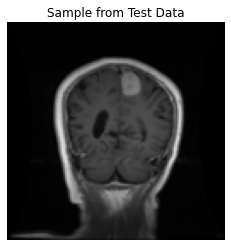

Predicted Class: meningioma
Actual Class: meningioma
Confidence: 0.9999


In [34]:
import random

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm  = img * 0.5 + 0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample from Test Data')
plt.show()

with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()
    
class_names = test_dl.dataset.classes
print(f'Predicted Class: {class_names[pred]}')
print(f'Actual Class: {class_names[label]}')
print(f'Confidence: {torch.softmax(logits, dim=1).max().item():.4f}')

In [36]:
torch.save(model.state_dict(), "model1.pt")